### HW2: Kevin Wang, Maddie Pellman, Varun Srinivasan, Tiffany Truong
Analyze restaurant inspections in NYC, starting November 1, 2014 and ending January 31, 2015.
### Setup
    1. Import pandas as pd
    2. Import matplotlib for plotting
    3. Read NYC_Restaurants.csv

In [5]:
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib

#unicode tells Pandas to treat all columns as strings (instead of integers/dates/etc.)
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)

Populating namespace from numpy and matplotlib

### Question 1: Create a unique name for each restaurant
Create a new column called 'RESTAURANT' and add values from DBA, BUILDING, STREET, and ZIP-CODE columns. Find the unique names for each restaurant and proceed to print out first 10 values of RESTAURANT column.

In [6]:
df['RESTAURANT'] = df['DBA'] + " " + df['BUILDING'] + " " + df["STREET"] + " " + df['ZIPCODE']

restaurants = df['RESTAURANT'].unique() #create unique name for each restaurant
print restaurants[0:10]

["WENDY'S 469 FLATBUSH AVENUE 11225"
 'TOV KOSHER KITCHEN 97-22 63 ROAD 11374'
 'BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD 11369'
 'MAY MAY KITCHEN 1269 SUTTER AVENUE 11208'
 'SEUDA FOODS 705 KINGS HIGHWAY 11223'
 'CARVEL ICE CREAM 203 CHURCH AVENUE 11218'
 'NORDIC DELICACIES 6909 3 AVENUE 11209'
 'GLORIOUS FOOD 522 EAST   74 STREET 10021'
 'THE MOVABLE FEAST 284 PROSPECT PARK WEST 11215'
 "BULLY'S DELI 759 BROADWAY 10003"]


### Question 2: How many restaurants are included in the data?
Print out the count of unique locations in RESTAURANT column by using len function.

In [7]:
print "There are " + str(len(restaurants)) + " restaurants included in the data"

There are 10114 restaurants included in the data


### Question 3: How many chains are there?
A chain is the same restaurant name occurring in at least two different addresses (building, street, zipcode). 

    1. Create a new column to df called ADDRESS that will store each row's address
    2. Create a new df unique_addresses with DBA, ADDRESS, and BORO. Apply  drop_duplicates() so that there will only be one row for each address
    3. Create a mask that determines whether a restaurant is a standalone or chain (duplicated)
    4. Create series that keeps one restaurant name per chain and drops standalones.
    5. Print out the length of the unique chains (aka amount of chains).


In [9]:
df['ADDRESS'] = df['BUILDING'] +  " " + df['STREET'] +  " " + df['ZIPCODE']
unique_addresses = df[['DBA', 'ADDRESS', 'BORO']].drop_duplicates()
chains_mask = unique_addresses['DBA'].duplicated()
chain_series = unique_addresses['DBA'][chains_mask].unique()
print "There are " + str(len(chain_series)) + " chains"

There are 368 chains


### Question 4: Plot a bar graph of the 20 most popular chains
    1. Get chain location addresses from unique_addresses that are in chain_series
    2. Use value_counts() to find count of each chain
    3. Plot 20 most popular chains by looking at counts

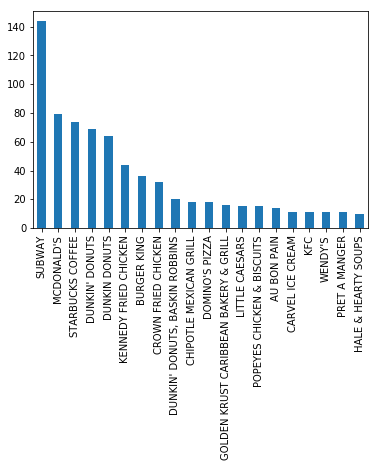

In [10]:
chain_addresses = unique_addresses[unique_addresses['DBA'].isin(chain_series)].sort_values('DBA')
#print len(chain_addresses)
chain_count = chain_addresses['DBA'].value_counts()
chain_count[:20].plot(kind='bar')

### Question 5: What fraction of all restaurants are chains?
Divide the length of chain_addresses over length of unique_addresses

In [11]:
chain_fraction = (float(len(chain_addresses['DBA'])) / len(unique_addresses['DBA']))
chain_percentage = chain_fraction*100
print str(chain_percentage) + "% of all restaurants are chains"

16.4722167293% of all restaurants are chains


### Question 6: Plot the number of non-chain restaurants in each boro

1. Find the restaurant count 
2. Create a mask where restaurant count = 1
3. Get new df where restaurant count = 1 (apply mask) 
4. Do value_counts on new frame, based on Boro, and plot 

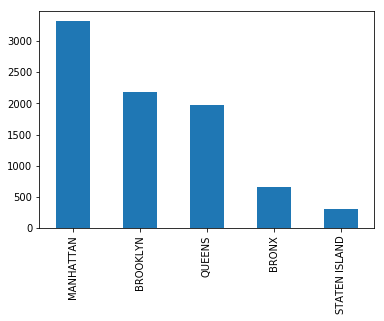

In [12]:
restaurant_count = unique_addresses['DBA'].value_counts()
mask = (restaurant_count == 1)
non_chains = restaurant_count[mask]
non_chain_addresses = unique_addresses[unique_addresses['DBA'].isin(non_chains.index)].sort_values('DBA')
non_chain_addresses['BORO'].value_counts().drop("Missing").plot(kind='bar') 

### Question 7: Plot the fraction of non-chain restaurants in each boro

1. Find chain restaurant and non-chain restaurant totals in each boro
2. Find total restauarants in each boro
3. Divide non-chain restautants by total restaurants and plot

The boro with the most independent restaurants, Manhattan, is NOT the one with the highest ratio of independent restaurants, Brooklyn. 

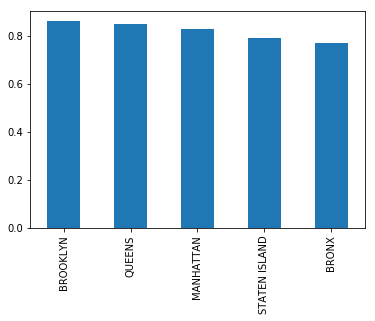

In [13]:
non_chain = non_chain_addresses['BORO'].value_counts().drop("Missing")
chain = chain_addresses['BORO'].value_counts().drop("Missing")
total_restaurants = chain+non_chain
(non_chain/total_restaurants).sort_values(ascending=False).plot(kind='bar')




### Question 8: Plot the popularity of cuisines

1. Create new dataframe that does NOT repeat restaurants
2. Using value counts, plot the popularity of the cuisines. 

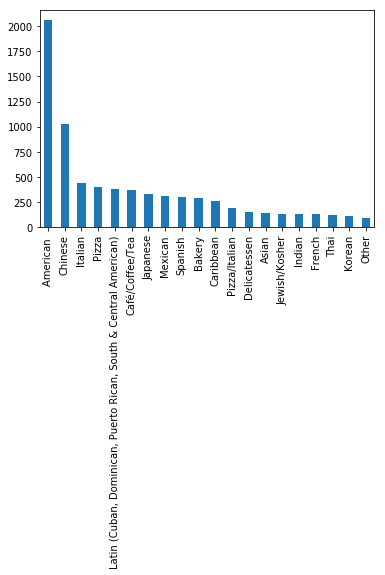

In [30]:
unique_restaurant_name = df.drop_duplicates(subset = 'DBA')
popularity_of_cuisines = unique_restaurant_name['CUISINE DESCRIPTION'].value_counts()
popularity_of_cuisines[:20].plot(kind='bar')


### Question 9: Plot the cuisines among restaurants which do not get cited for violations

1. Find all restaurant/cuisine combinations where there is no violation
2. Plot the dataframe based on cuisine description

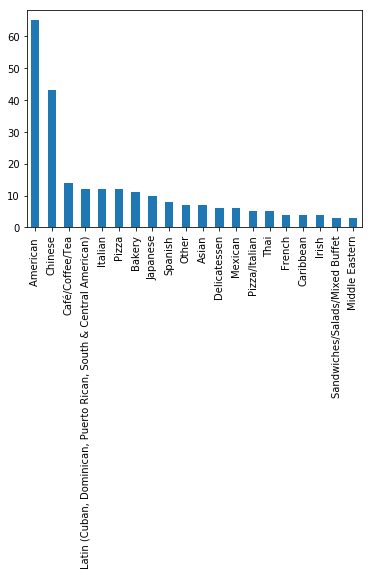

In [32]:

no_violations_mask = unique_restaurant_name['VIOLATION DESCRIPTION'].isnull()
restuarant_cuisine = unique_restaurant_name[no_violations_mask][['RESTAURANT','CUISINE DESCRIPTION']]
not_cited = restuarant_cuisine['CUISINE DESCRIPTION'].value_counts()
not_cited[:20].plot(kind='bar')

### Question 10: What cuisines tend to be the "cleanest"?

1. create function to find cuisines that have more than 20 inspections
2. use function to make mask
3. Apply mask to series from problem 8 and problem 9 and divide the two by each other
4. sort the values and show only top 10 "cleanest" restaurants


In [52]:
def more_than_20(num):
    return num >= 20

cuisine_counts = unique_restaurant_name['CUISINE DESCRIPTION'].value_counts()
mask = cuisine_counts.map(more_than_20)

cleanest_cuisines = (not_cited[mask]/popularity_of_cuisines[mask]).sort_values(ascending=False)
cleanest_cuisines[cleanest_cuisines.notnull()][:10]




#I can't figure out what this quesiton is asking. Are these unique restaurants, or just inspections regardless of how many times
#per restaurant. Also is some inspection 1 or more, or is it all? Need clarification.

Vietnamese/Cambodian/Malaysia     0.100000
Soul Food                         0.090909
Other                             0.073684
Sandwiches/Salads/Mixed Buffet    0.061224
Irish                             0.057143
Continental                       0.050000
Barbecue                          0.050000
Asian                             0.049645
Hamburgers                        0.047619
Donuts                            0.045455
Name: CUISINE DESCRIPTION, dtype: float64

### Question 11: What are the most common violations in each borough?

In [58]:
#Used the crosstab function in pandas and set the index as "Violation Description" and the 'Boro', which calculates frequency from the dataframe

violation_b = pd.crosstab(df['VIOLATION DESCRIPTION'],df['BORO'])
violation_b

BORO                                                BRONX  BROOKLYN  \
VIOLATION DESCRIPTION                                                 
Choking first aid poster not posted. Alcohol...     12        40   
''''No Smoking and/or 'Smoking Permitted sign...      1         5   
''''Wash hands sign not posted at hand wash fa...     21        57   
A food containing artificial trans fat, with 0....      5        12   
Accurate thermometer not provided in refrigerat...     21        76   
Appropriately scaled metal stem-type thermomete...     27       120   
Ashtray present in smoke-free area.                     4         4   
Bulb not shielded or shatterproof, in areas whe...     20        93   
Caloric content not posted on menus, menu board...      0         4   
Caloric content range (minimum to maximum) not ...      0         0   
Canned food product observed dented and not seg...     16        33   
Canned food product observed swollen, leaking o...      0         2   
Cold food item held above 41º F (smoked fish an...    168       635   
Covered garbage receptacle not provided or inad...      7        35   
Current letter grade card not posted.                  22        61   
Duties of an officer of the Department interfer...      2         3   
Eggs found dirty/cracked; liquid, frozen or pow...      0         3   
Evidence of mice or live mice present in facili...    313       937   
Evidence of rats or live rats present in facili...     40        93   
Facility not vermin proof. Harborage or conditi...    452      1242   
Failure to comply with an Order of the Board of...      2         6   
Filth flies or food/refuse/sewage-associated (F...    178       392   
Flavored tobacco products sold or offered for s...      4         6   
Food Protection Certificate not held by supervi...     90       238   
Food allergy information poster not conspicuous...      2        16   
Food allergy information poster not posted in l...      0         0   
Food contact surface improperly constructed or ...      1         1   
Food contact surface not properly maintained.          42       187   
Food contact surface not properly washed, rinse...    156       615   
Food from unapproved or unknown source or home ...      2        25   
...                                                   ...       ...   
Non-food contact surface improperly constructed...    500      1485   
Notice of the Department of Board of Health mut...      0         2   
Nuisance created or allowed to exist. Facility ...      6        37   
Operator failed to make good faith effort to in...      5         2   
Original label for tobacco products sold or off...      0         2   
Out-of package sale of tobacco products observed.       0         0   
Permit not conspicuously displayed.                     6         4   
Personal cleanliness inadequate. Outer garment ...     43       190   
Pesticide use not in accordance with label or a...     41       147   
Plumbing not properly installed or maintained; ...    149       490   
Potable water supply inadequate. Water or ice n...      0         0   
Precooked potentially hazardous food from comme...      0         5   
Proper sanitization not provided for utensil wa...     53       154   
ROP processing equipment not approved by DOHMH.         0         1   
Raw food not properly washed prior to serving.          0         0   
Raw, cooked or prepared food is adulterated, co...     50       218   
Sanitized equipment or utensil, including in-us...     48       195   
Sewage disposal system improper or unapproved.          1         3   
Shellfish not from approved source, improperly ...      0        10   
Single service item reused, improperly stored, ...     27        93   
Smoke free workplace smoking policy inadequate,...     45       222   
Thawing procedures improper.                           36       109   
The original nutritional fact labels and/or ing...     48       125   
Tobacco use, eating, or 

In [51]:
#Uses the idxmax over the crosstab and gives max for each column (the boro)
violation_b.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
Missing          Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

In [69]:
#Uses a new crosstab, but normalizes it by taking it as a fraction of that violation (horizontal totals)
violation_normal = pd.crosstab(df['VIOLATION DESCRIPTION'],df['BORO'],normalize="index")
violation_normal.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
Missing          ''''Wash hands sign not posted at hand wash f...
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object